In [1]:
from skimage.io import imread
from tnia.plotting.plt_helper import random_label_cmap
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
from stardist.models import StarDist2D, Config2D
from tnia.plotting.plt_helper import imshow_multi2d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02202643..1.0837004].


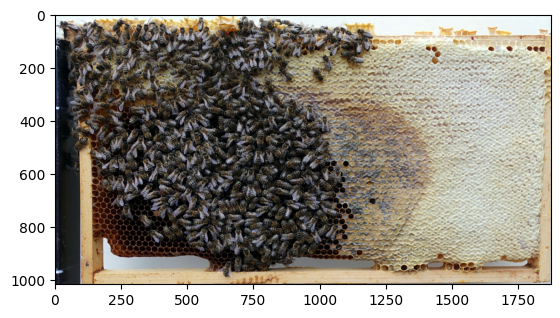

In [2]:

tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2023_12_20_segmenting_bees')
model_path = parent_path / 'model'
from csbdeep.utils import normalize

#test_name='bsp1-2.jpg'
test_name='bee1-s.tif'
testim = imread(parent_path  / test_name) 
testim = normalize(testim,1,99.8, axis=(0,1))

testim_crop = testim[150:800,:]
testim_crop = normalize(testim_crop,1,99.8, axis=(0,1))
plt.imshow(testim)

In [12]:
#model_name = "model1"
#model_name = "model_aug"
model_name = "model_uber"

model = StarDist2D(config=None, name=model_name, basedir=model_path)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.481877, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02202643..1.0837004].


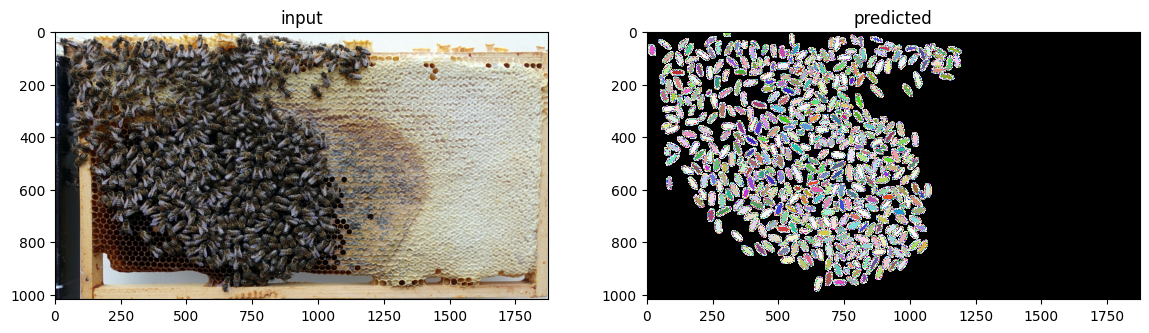

In [13]:
labels, details = model.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)
fig = imshow_multi2d([testim,labels],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

In [6]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim, name='testim')
viewer.add_labels(labels, name='predicted octohedrons')

<Labels layer 'predicted octohedrons' at 0x19e26cd02b0>

In [10]:
base_name = test_name.split('.')[0]
print(base_name)

bee1-s


In [11]:
from skimage.io import imsave
import os

labels_path = parent_path / 'labels'

name = base_name + '-labels-from-model1.tif'
imsave(labels_path / name , labels.astype('uint16'))

743920710.py (7): D:\images\tnia-python-images\imagesc\2023_12_20_segmenting_bees\labels\bee1-s-labels-from-model1.tif is a low contrast image


In [ ]:
labels_test = imread( labels_path / name) 
fig = imshow_multi2d([testim,labels_test],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])